# Iris Flower Classification 

## Step 1: Importing Libraries
We import the required libraries for data handling, visualization, and machine learning.


In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import joblib

%matplotlib inline


## Step 2: Load Dataset
We will use the famous Iris dataset available in scikit-learn. It contains 150 samples of iris flowers with 4 features and 3 target species.


In [66]:
iris = load_iris(as_frame=True)

df = iris["data"]
df["target"] = iris["target"]
df["target_name"] = df["target"].map({0: "setosa", 1: "versicolor", 2: "virginica"})

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## Step 3: Exploratory Data Analysis (EDA)
We’ll visualize distributions and relationships between features to understand patterns in the dataset.


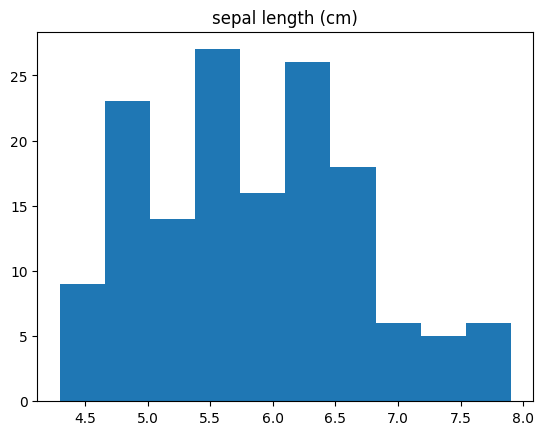

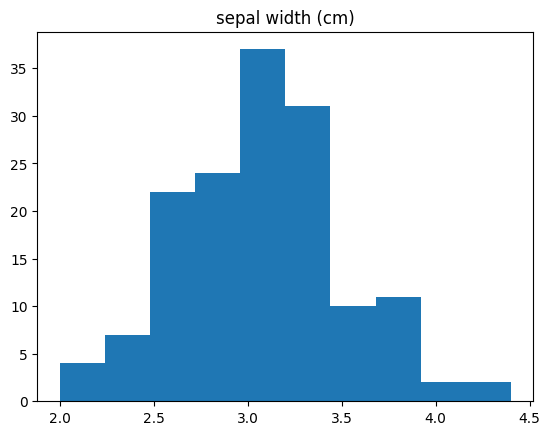

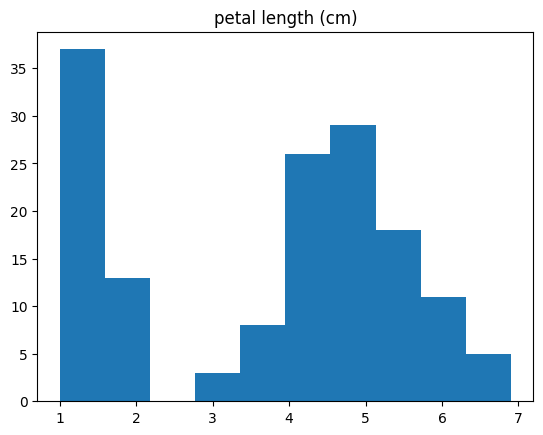

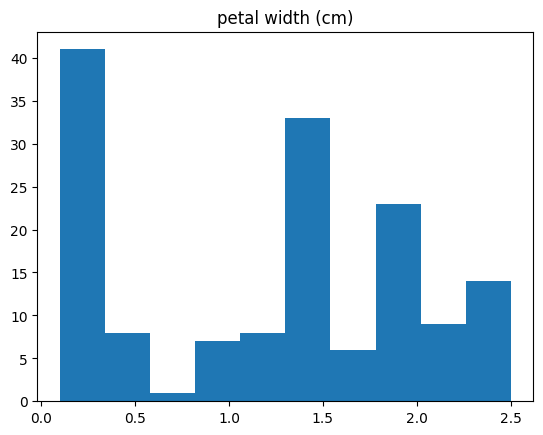

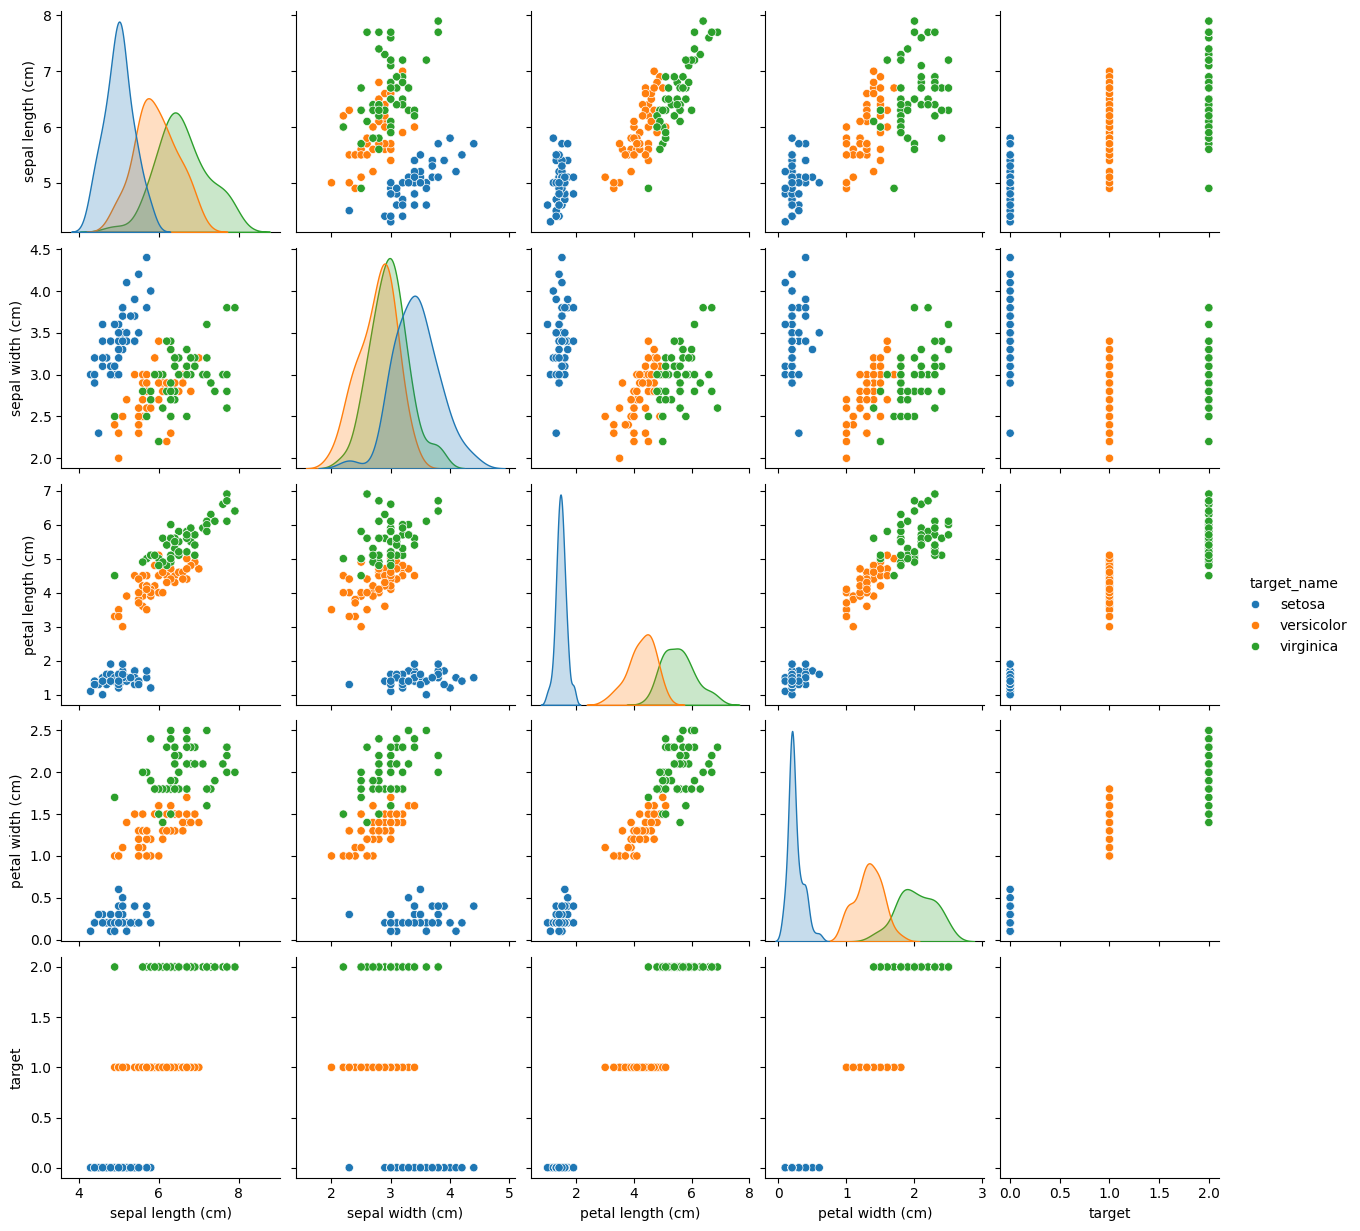

In [65]:
# Histograms for each feature
for col in df.columns[:-2]:
    df[col].hist(grid=False)
    plt.title(col)
    plt.show()

# Pairplot to visualize relationships
sns.pairplot(df, hue="target_name")
plt.show()


## Step 4: Train-Test Split
We’ll split the dataset into 75% training and 25% testing sets.


In [68]:
df_train, df_test = train_test_split(df, test_size=0.25, random_state=42, stratify=df["target"])

X_train = df_train.drop(columns=["target","target_name"]).values
Y_train = df_train["target"].values

X_test = df_test.drop(columns=["target","target_name"]).values
Y_test = df_test["target"].values

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)



Train shape: (112, 4)
Test shape: (38, 4)


## Step 5: Logistic Regression Model
We’ll train a Logistic Regression classifier and evaluate its performance.
#prepare data for modeling

In [ ]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, Y_train)

y_test_pred = model.predict(X_test)

print("Test Accuracy:", model.score(X_test, Y_test))


## Step 6: Cross-Validation
To check consistency, we’ll use 5-fold cross-validation on the training set.


In [69]:
accuracies = cross_val_score(model, X_train, Y_train, cv=5, scoring="accuracy")
print("Cross-validation Accuracy:", np.mean(accuracies))


Cross-validation Accuracy: 0.9462450592885375


## Step 7: Hyperparameter Tuning
We’ll try different values of the regularization parameter `C` and compare results.


In [70]:
results = []
for reg_param in (0.1, 0.5, 1, 1.5, 2, 2.5, 3):
    model = LogisticRegression(max_iter=200, C=reg_param)
    acc = np.mean(cross_val_score(model, X_train, Y_train, cv=5))
    results.append({"C": reg_param, "Accuracy": acc})

pd.DataFrame(results)


,C,Accuracy
0,0.1,0.946245
1,0.5,0.964032
2,1.0,0.964032
3,1.5,0.964032
4,2.0,0.946245
5,2.5,0.946245
6,3.0,0.946245


## Step 8: Model Evaluation
We’ll evaluate the best model on the test set using confusion matrix and classification report.


In [ ]:
cm = confusion_matrix(Y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=iris["target_names"],
            yticklabels=iris["target_names"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(Y_test, y_test_pred, target_names=iris["target_names"]))


## Step 9: Visualizing Misclassifications


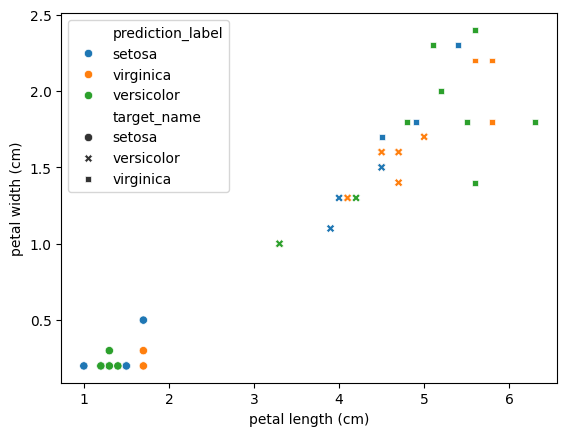

In [71]:
df_predictions_test = df_test.copy()
df_predictions_test["prediction"] = y_test_pred
df_predictions_test["prediction_label"] = df_predictions_test["prediction"].map(
    {0: "setosa", 1: "versicolor", 2: "virginica"}
)

sns.scatterplot(x="petal length (cm)", y="petal width (cm)",
                hue="prediction_label", style="target_name", data=df_predictions_test)
plt.show()


## Step 10: Save the Trained Model
This will be used in the Streamlit app (`app.py`).


In [75]:
final_model = LogisticRegression(max_iter=200, C=2)
final_model.fit(X_train, Y_train)

joblib.dump(final_model, "iris_model.pkl")


['iris_model.pkl']